In [4]:
#import libraries
import streamlit as st

import numpy as np
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
from datetime import time, date, datetime

import warnings

%matplotlib inline
warnings.filterwarnings("ignore")

## A. Import dataset

In [ ]:
def upload_dataset(caption: str) -> pd.DataFrame:
    """Let the user upload a dataset as CSV"""

    file = st.file_uploader(caption, type=["csv"])
    if not file:
        st.warning("Please upload a CSV file.")
        return pd.DataFrame()
    data = pd.read_csv(file)
    st.write(f"DataFrame size: {len(data)}")
    file.close()
    st.dataframe(data.head())

    return data

## B. Data Wrangling

### B1. Pivot

In [ ]:
# Dashboard
if add_sidebar == 'Pivot':
    st.subheader('Pivot Data Dashboard')
    data=upload_dataset('Upload CSV file')
    
    st.write('Time Range')
    exp_period = st.slider('Choose a time range of completed experiments:',
                           date(2019,1,1), date.today(),
                           value=(date(2020,1,1),date(2021,1,1)),
                           format='YYYY/MM/DD')

#### B1.a. Data preprocessing

**Raw CFU** file is a template. To write a function:
- skiprows=2
- key: 'Batch' col
- features: 'Date','CFU/mL','CFU/g' cols
- remove rows with NaN in 'Batch' col

In [2]:
rawcfu_df = pd.read_csv(filepath_or_buffer="Data files/Raw CFU.csv", skiprows=2)
rawcfu_df.head()

,Batch,Sample Description,Code No.,Logs,No. Reps,Extra,grams,mL,Who,Date,...,R2,R3,CFU/mL,SD CFU/mL,CFU/g,SD CFU/g,CV,Remark/AW,Unnamed: 20,Unnamed: 21
0,FDL-086-7,Pivot FD,NaN,"5, 6, 7",2.0,NaN,0.1084,2.06,CL,2022/10/12,...,56.0,NaN,4.28E+09,2.88E+09,8.13E+10,5.48E+10,67.4%,Contaminated,NaN,NaN
1,FDL-090C-T09,Pivot FD,NaN,"5, 6, 7",2.0,NaN,0.1029,1.96,CL,2022/10/12,...,31.0,NaN,1.18E+10,8.49E+08,2.24E+11,1.61E+10,7.2%,NaN,NaN,NaN
2,FDL-095A-T08,Pivot FD,NaN,"5, 6, 7",2.0,NaN,0.1083,2.06,CL,2022/10/12,...,65.0,NaN,2.32E+08,3.96E+07,4.41E+09,7.52E+08,17.1%,NaN,NaN,NaN
3,FDL-095-T05,Pivot FD,NaN,"5, 6, 7",2.0,NaN,0.0976,1.85,CL,2022/10/12,...,0.0,NaN,2.00E+06,2.83E+06,3.80E+07,5.37E+07,141.4%,too low - replate,NaN,NaN
4,FDL-92B-T12,Pivot FD,NaN,"5, 6, 7",2.0,NaN,0.1002,1.90,CL,2022/10/12,...,330.0,NaN,1.51E+09,2.72E+08,2.87E+10,5.16E+09,18.0%,NaN,NaN,NaN


In [3]:
# keep relevant cols
rawcfu_df = rawcfu_df[['Batch','Date','CFU/mL','CFU/g']]
rawcfu_df

,Batch,Date,CFU/mL,CFU/g
0,FDL-086-7,2022/10/12,4.28E+09,8.13E+10
1,FDL-090C-T09,2022/10/12,1.18E+10,2.24E+11
2,FDL-095A-T08,2022/10/12,2.32E+08,4.41E+09
3,FDL-095-T05,2022/10/12,2.00E+06,3.80E+07
4,FDL-92B-T12,2022/10/12,1.51E+09,2.87E+10
...,...,...,...,...
783,NaN,NaN,#DIV/0!,#DIV/0!
784,NaN,NaN,#DIV/0!,#DIV/0!
785,NaN,NaN,#DIV/0!,#DIV/0!
786,NaN,NaN,#DIV/0!,#DIV/0!


<AxesSubplot:>

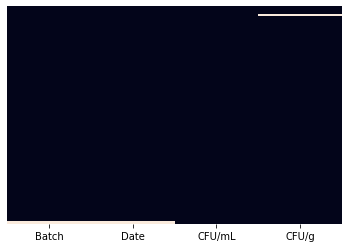

In [5]:
# check NaN values
sns.heatmap(rawcfu_df.isnull(), yticklabels=False, cbar=False)

(774, 4)

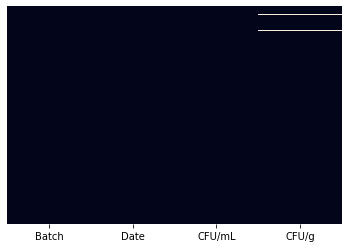

In [8]:
# remove rows with NaN in 'Batch" col
rawcfu_df.dropna(subset=['Batch'],inplace=True)
sns.heatmap(rawcfu_df.isnull(), yticklabels=False, cbar=False)
rawcfu_df.shape

# NaN in CFU/mL or CFU/g indicate either the samples in liq or sol form

In [ ]:
def upload_dataset(caption: str) -> pd.DataFrame:
    """
    Let the user upload a dataset as CSV then cleans up the file contents.
    
    INPUT: a .csv file set in a template
    
    OUTPUT: a clean dataframe with relevant info
    """

    file = st.file_uploader(caption, type=["csv"])
    if not file:
        st.warning("Please upload a CSV file.")
        return pd.DataFrame()
    
    # read in the template and select relevant information
    data = pd.read_csv(file, skiprows=2)
    data = data[['Batch','Date','CFU/mL','CFU/g']]
    data.dropna(subset=['Batch'],inplace=True)

    st.write(f"DataFrame size: {len(data)}")
    file.close()
    st.dataframe(data.head())

    return data

### B2. Boost

In [ ]:
if add_sidebar == 'Boost':
    st.subheader('Boost Data Dashboard')
    data=upload_dataset('Upload CSV file')
    
    st.write('Time Range')
    exp_period = st.slider('Choose a time range of completed experiments:',
                           date(2019,1,1), date.today(),
                           value=(date(2020,1,1),date(2021,1,1)),
                           format='YYYY/MM/DD')
    
    
                                  
    #data preprocessing
    #features engineering 